In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#folder shortcut
path = r'C:\Users\cook family\Desktop\Citi_Bike'

In [3]:
path

'C:\\Users\\cook family\\Desktop\\Citi_Bike'

In [4]:
citibike = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'citibk.csv'), index_col = False)

In [5]:
citibike.head()

Unnamed: 0 day_of_the_week  start_hour  start_station_id  \
0           0             Mon          18               523   
1           1             Thu          18               257   
2           2             Wed          19               479   
3           3             Sat          11               527   
4           5             Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

         start_of_ride          end_of_ride  
0  2013-09-09 18:18:00  2013-09-09 18:35:00  
1  2013-09-12 18:38:00  2013-09-12 18:48:00  
2  2013-09-18 19:44:00  2013-09-18 19:50:00  
3  2013-09-28 11:54:00  2013-09-28 12:03:00  
4  2013-09-27 22:01:00  2013-09-27 22:08:00

In [6]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42993 non-null  int64  
 1   day_of_the_week          42993 non-null  object 
 2   start_hour               42993 non-null  int64  
 3   start_station_id         42993 non-null  int64  
 4   start_station_name       42993 non-null  object 
 5   start_station_latitude   42993 non-null  float64
 6   start_station_longitude  42993 non-null  float64
 7   end_station_id           42993 non-null  int64  
 8   end_station_name         42993 non-null  object 
 9   end_station_latitude     42993 non-null  float64
 10  end_station_longitude    42993 non-null  float64
 11  trip_duration            42993 non-null  int64  
 12  subscriber               42993 non-null  object 
 13  birth_year               42993 non-null  float64
 14  gender                

In [7]:
#changing gender variables to numeric - 0=unknown 1=male 2= female
citibike['gender']=citibike['gender'].replace(['Uknown','male','female'],[0,1,2])

# Variables for Visuals

In [8]:
# Create subset
df_sub = citibike[['birth_year', 'trip_duration' , 'gender' , 'start_hour' , 'start_station_name' , 'end_station_name' , 'day_of_the_week' , 'start_station_latitude' , 'end_station_latitude' , 'start_station_longitude' , 'end_station_longitude']]

In [9]:
df_sub

birth_year  trip_duration  gender  start_hour       start_station_name  \
0          1968.0            993       2          18          W 38 St & 8 Ave   
1          1983.0            581       1          18  Lispenard St & Broadway   
2          1989.0            361       1          19          9 Ave & W 45 St   
3          1988.0            561       2          11          E 33 St & 1 Ave   
4          1986.0            427       2          22    Lafayette St & E 8 St   
...           ...            ...     ...         ...                      ...   
42988      1973.0            975       1          15          W 21 St & 6 Ave   
42989      1975.0           1541       1          16    Spruce St & Nassau St   
42990      1970.0           1191       2          17     Johnson St & Gold St   
42991      1961.0           1050       2          18       Broadway & E 22 St   
42992      1980.0            370       2          21         W 43 St & 10 Ave   

               end_station_name day_of_the_week  start_station_latitude  \
0               W 20 St & 7 Ave             Mon               40.754666   
1           St Marks Pl & 2 Ave             Thu               40.719392   
2              W 56 St & 10 Ave             Wed               40.760193   
3               E 52 St & 2 Ave             Sat               40.743156   
4             E 7 St & Avenue A             Fri               40.730287   
...                         ...             ...                     ...   
42988          W 37 St & 10 Ave             Sat               40.741740   
42989         E 2 St & Avenue B             Sun               40.711464   
42990  Cleveland Pl & Spring St             Sat               40.694749   
42991           W 43 St & 6 Ave             Sat               40.740343   
42992           W 39 St & 9 Ave             Mon               40.760094   

       end_station_latitude  start_station_longitude  end_station_longitude  
0                 40.742388               -73.991382             -73.997262  
1                 40.728419               -74.002472             -73.987140  
2                 40.768254               -73.991255             -73.988639  
3                 40.756014               -73.974347             -73.967416  
4                 40.726218               -73.990765             -73.983799  
...                     ...                      ...                    ...  
42988             40.756604               -73.994156             -73.997901  
42989             40.722174               -74.005524             -73.983688  
42990             40.721816               -73.983625             -73.997203  
42991             40.755273               -73.989551             -73.983169  
42992             40.756458               -73.994618             -73.993722  

[42993 rows x 11 columns]

# Step 3 - Create Heatmap

In [10]:
# make a second subset 
sub_2=citibike[['start_hour', 'trip_duration' , 'start_station_latitude','start_station_longitude', 'birth_year' , 'end_station_latitude','end_station_longitude']]

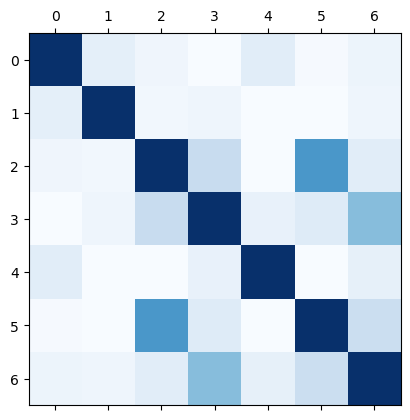

<Figure size 800x800 with 0 Axes>

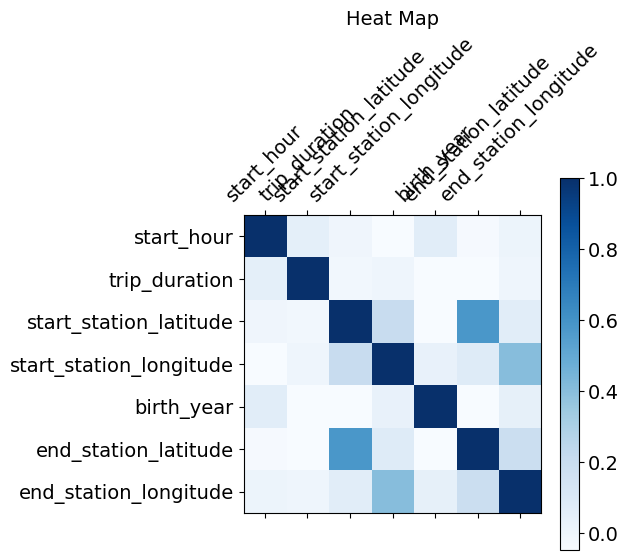

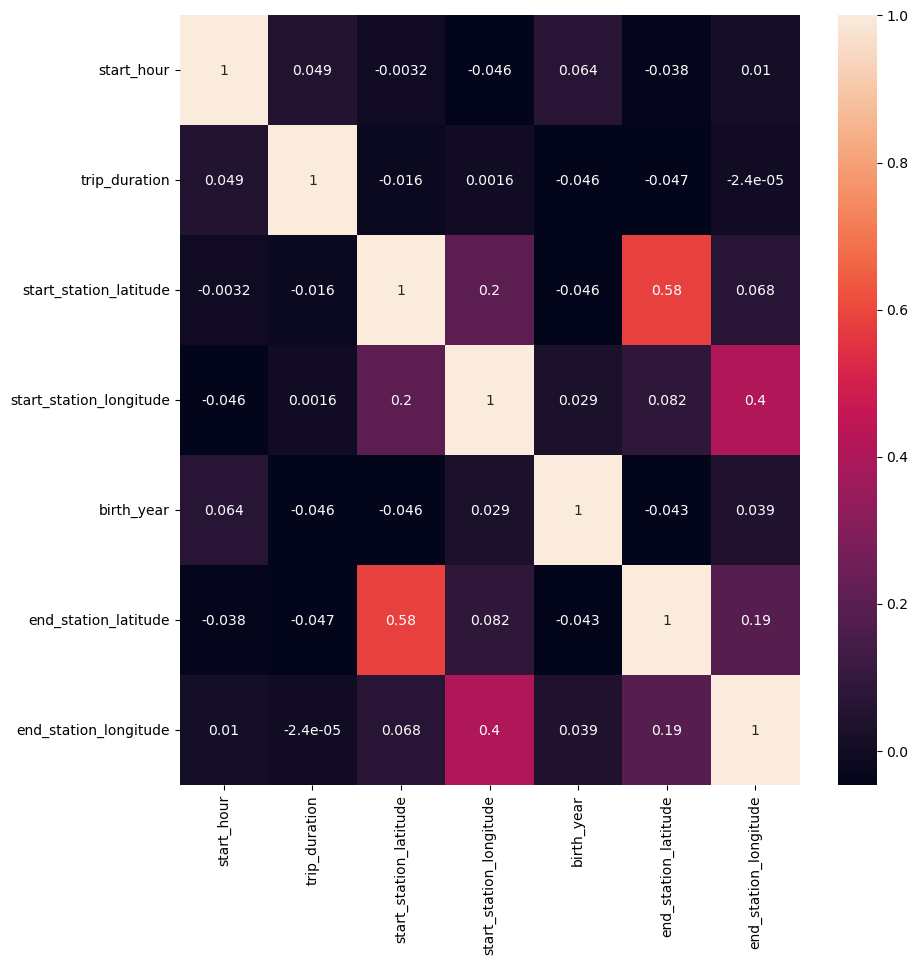

In [11]:
# Correlation heatmap using matplotlib
plt.matshow(sub_2.corr(), cmap='Blues'); 
# labels and legend
f= plt.figure(figsize=(8,8))
# figure size
plt.matshow(sub_2.corr(), cmap='Blues'); 
# type of plot
plt.xticks(range(sub_2.shape[1]),sub_2.columns, fontsize=14, rotation=45)
#x axis labels
plt.yticks(range(sub_2.shape[1]),sub_2.columns, fontsize=14)
# y axis labels
cb=plt.colorbar()
# add a color legend
cb.ax.tick_params(labelsize=14)
# add a font size
plt.title('Heat Map',fontsize=14)
# add title
f,ax=plt.subplots(figsize=(10,10))
#create the heat map in seaborn by applying a heatmap onto the correlation matrix
corr=sns.heatmap(sub_2.corr(), annot = True, ax=ax) 

Based on the reading there seems to be a strong correclation between my variables for start_station_longitude and end_station_longitude.  since they are a higher number. It does seems like trip duration has a lower number and possible a negative correlation. Generally I find this map hard to read or get a grasp of what the information is telling me. 

# Step 4 - Scatterplots

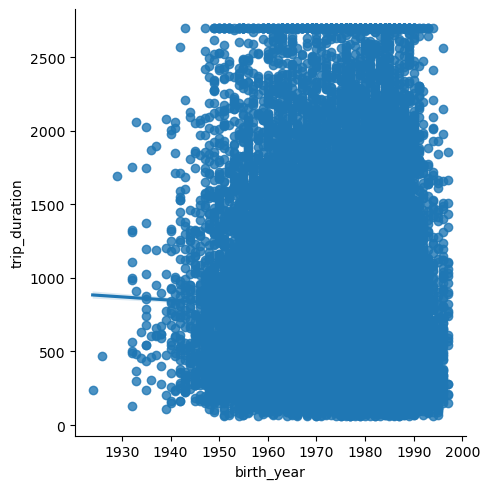

In [12]:
# Create scatterplot for the "birth_year" and "trip_duration" 
sns.lmplot(x = 'birth_year', y = 'trip_duration', data = citibike)

In [13]:
citibike['birth_year'].describe()

count    42993.000000
mean      1975.674459
std         10.938735
min       1924.000000
25%       1968.000000
50%       1978.000000
75%       1984.000000
max       1997.000000
Name: birth_year, dtype: float64

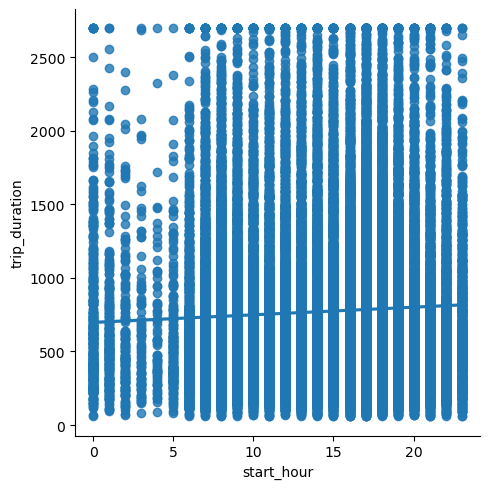

In [14]:
# create a scatterplot for the start hour and trip duration in seaborn
sns.lmplot(x='start_hour', y='trip_duration', data=citibike)

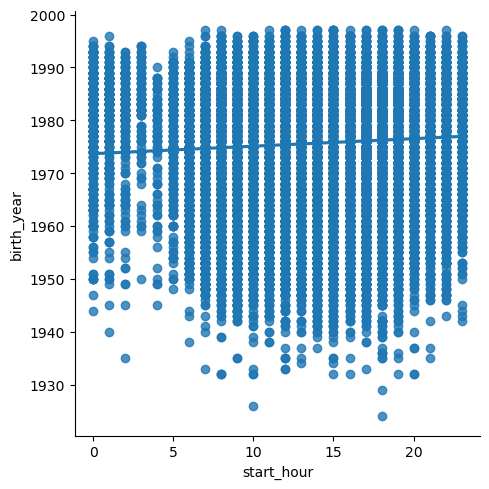

In [15]:
# create a scatterplot for the start hour and birth year
sns.lmplot(x='start_hour', y='birth_year', data=citibike)

<Axes: >

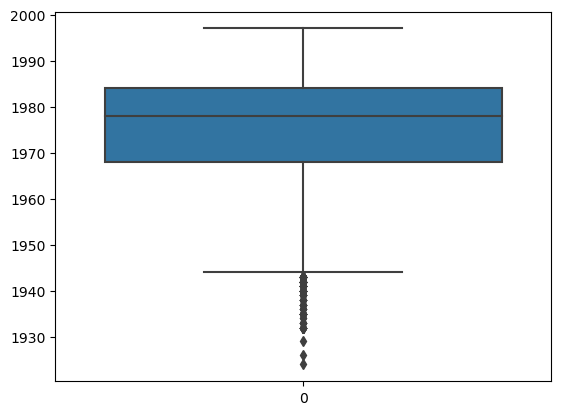

In [16]:
sns.boxplot(citibike['birth_year'])

The above scatter plots are very crowded and might not be helpful to my analysis. It is hard to see any real difference in the graphs. On the birth_year there are some outliers born before 1935 not sure if that is useful yet. 

# Step 5 - Pair Plots

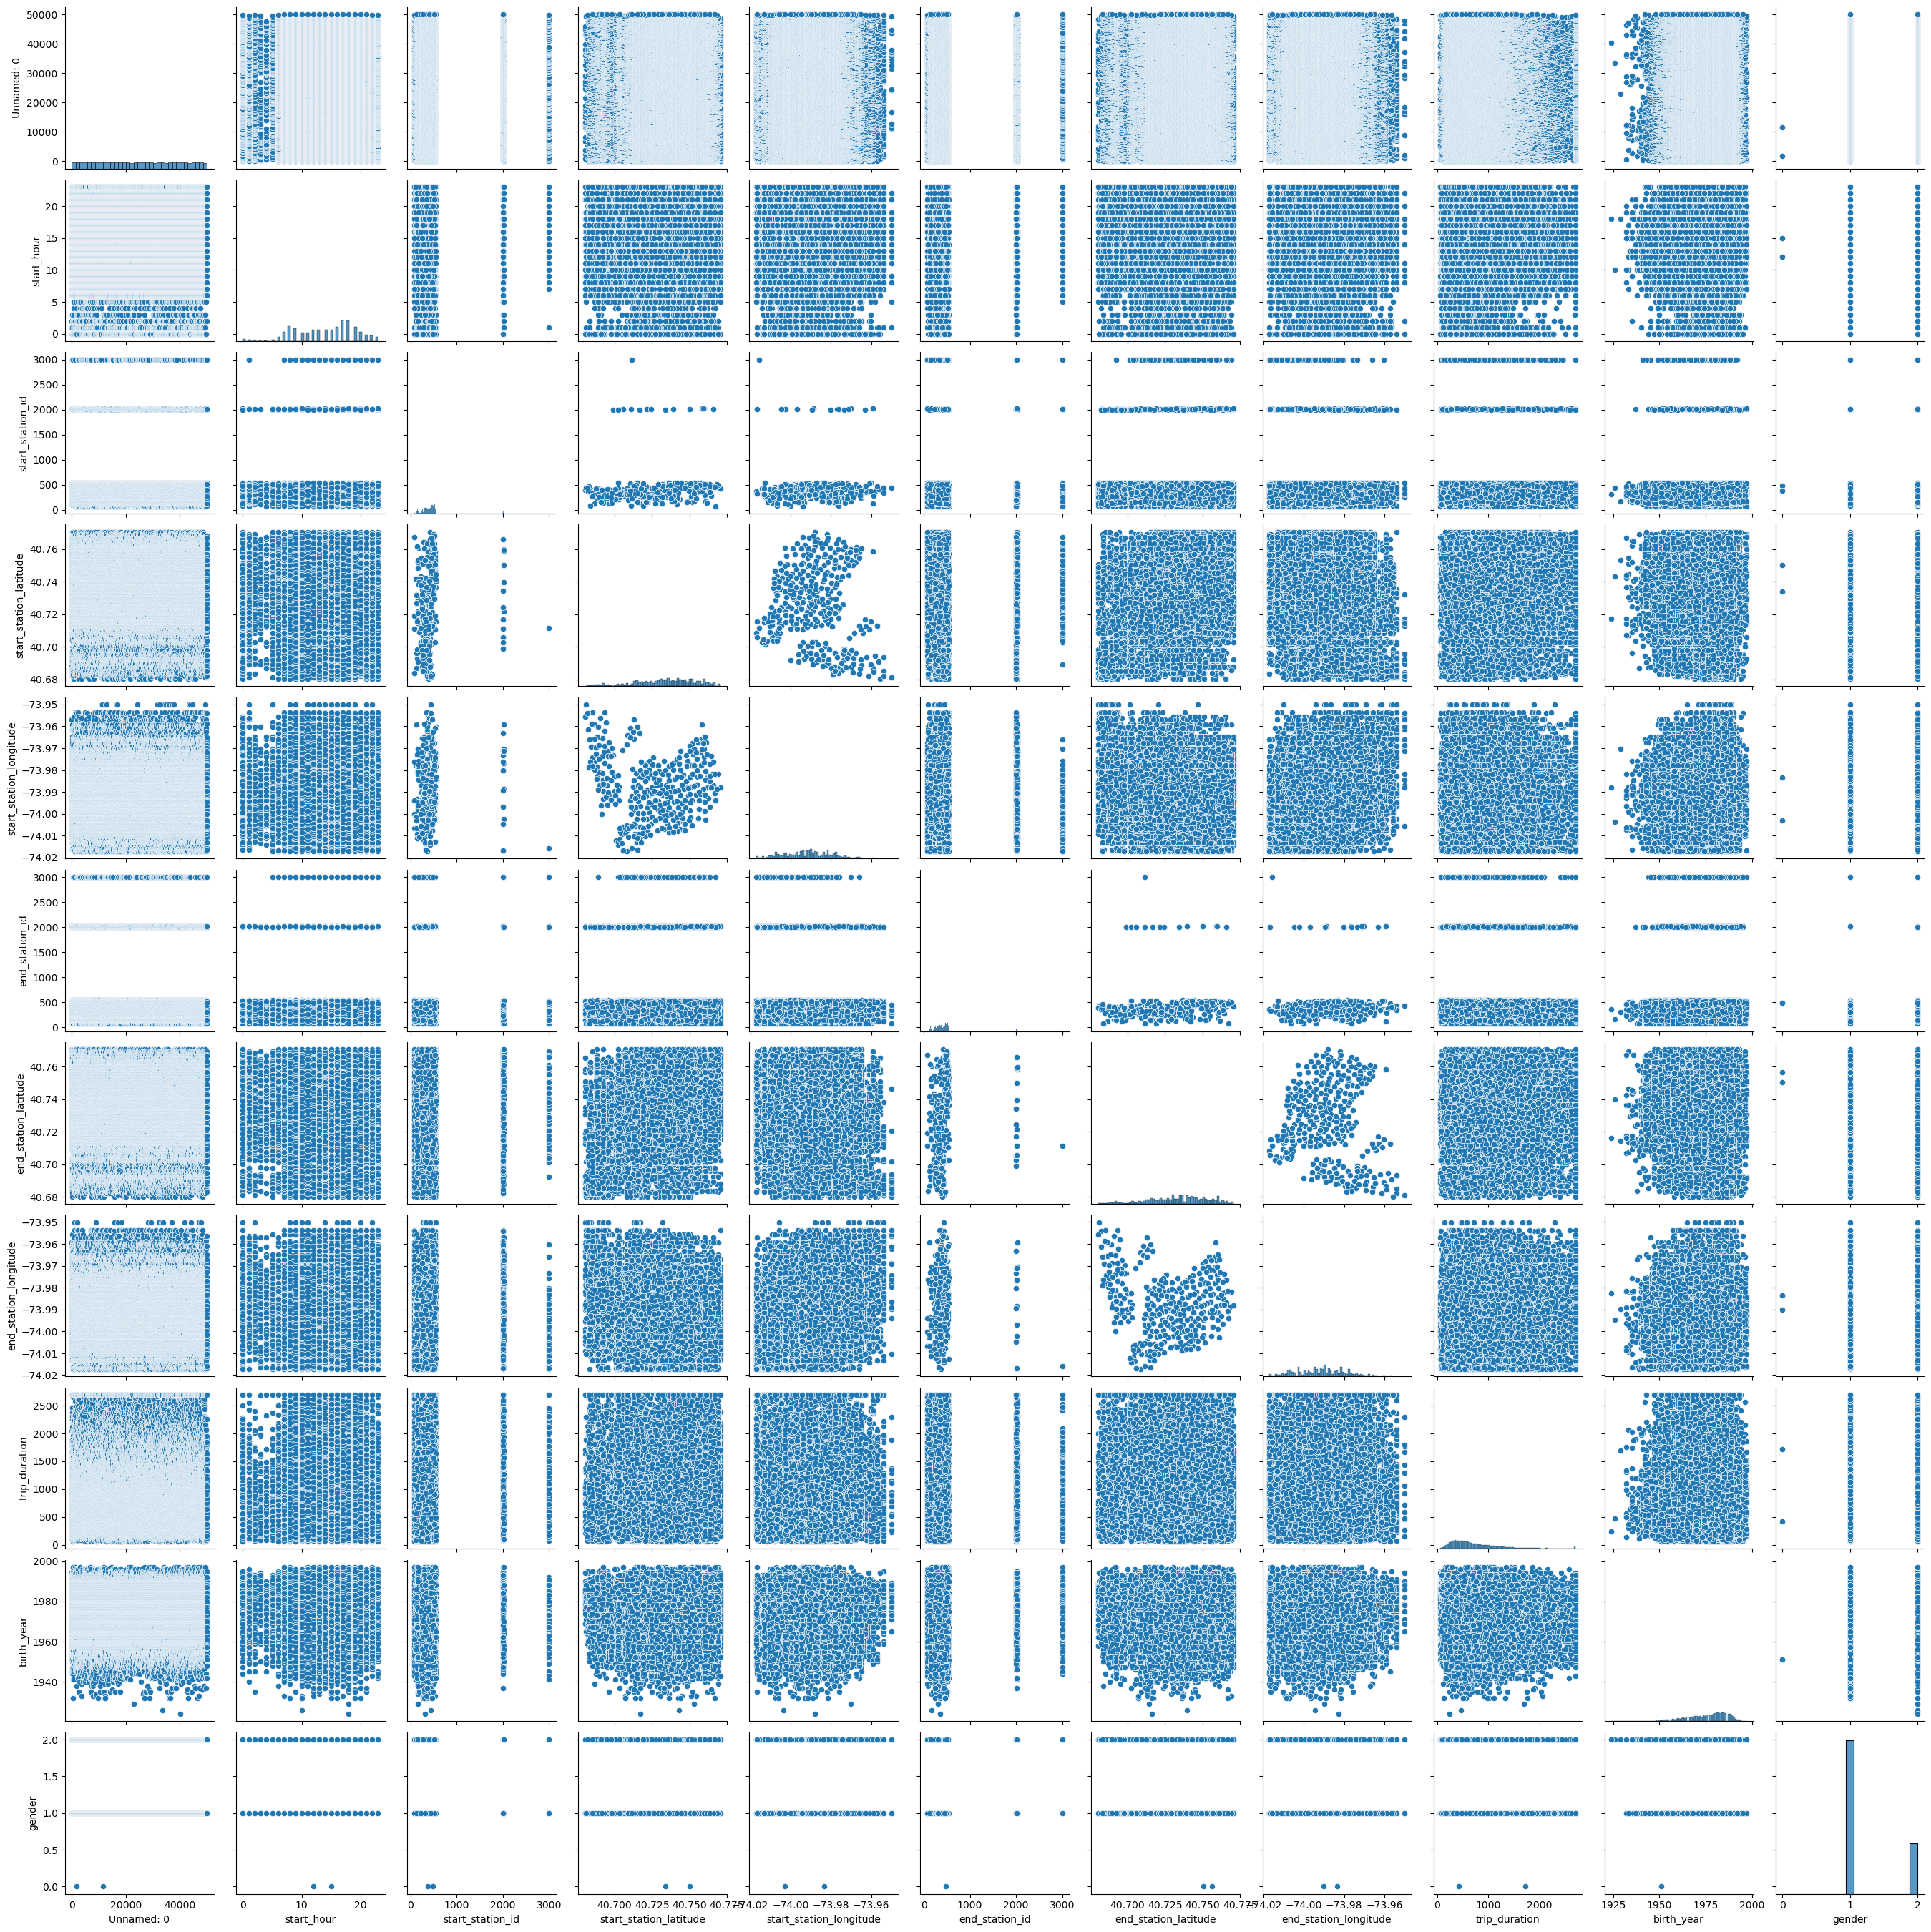

In [17]:
# Create a pair plot of entire dataset
g = sns.pairplot(citibike)

The pari plot gives quite alot of maps not sure yet if it is useful. Alot of the graphs are completely covered I might need to change the variables. 

# Step 6 - Categorical Plot

In [18]:
citibike.columns

Index(['Unnamed: 0', 'day_of_the_week', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride'],
      dtype='object')

In [19]:
citibike.groupby('gender').agg({'trip_duration': ['mean', 'min', 'max', 'sum']})

trip_duration                     
                mean  min   max       sum
gender                                   
0        1069.000000  418  1720      2138
1         739.520119   60  2697  23910904
2         864.435635   60  2697   9213155

<Axes: xlabel='gender', ylabel='Count'>

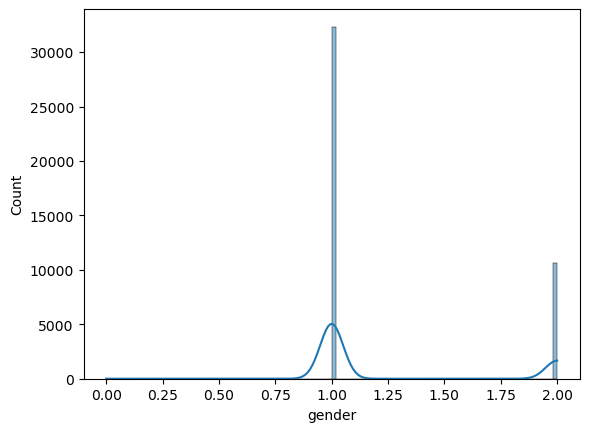

In [20]:
#Histogram
sns.histplot(citibike['gender'], bins = 100, kde = True)

In [21]:
citibike.describe()

Unnamed: 0    start_hour  start_station_id  start_station_latitude  \
count  42993.000000  42993.000000      42993.000000            42993.000000   
mean   24965.816179     14.085316        437.205545               40.734477   
std    14446.832971      4.932889        340.848654                0.019598   
min        0.000000      0.000000         72.000000               40.680342   
25%    12441.000000     10.000000        304.000000               40.721101   
50%    24957.000000     15.000000        402.000000               40.736245   
75%    37486.000000     18.000000        485.000000               40.749718   
max    49999.000000     23.000000       3002.000000               40.770513   

       start_station_longitude  end_station_id  end_station_latitude  \
count             42993.000000    42993.000000          42993.000000   
mean                -73.990948      434.577094             40.734070   
std                   0.012367      332.801118              0.019603   
min                 -74.017134       72.000000             40.680342   
25%                 -74.000040      305.000000             40.720828   
50%                 -73.990765      402.000000             40.735877   
75%                 -73.981948      483.000000             40.749013   
max                 -73.950048     3002.000000             40.770513   

       end_station_longitude  trip_duration    birth_year        gender  
count           42993.000000   42993.000000  42993.000000  42993.000000  
mean              -73.991242     770.502105   1975.674459      1.247854  
std                 0.012375     523.444233     10.938735      0.431880  
min               -74.017134      60.000000   1924.000000      0.000000  
25%               -74.000271     395.000000   1968.000000      1.000000  
50%               -73.990985     621.000000   1978.000000      1.000000  
75%               -73.982578     999.000000   1984.000000      1.000000  
max               -73.950048    2697.000000   1997.000000      2.000000

<Axes: xlabel='start_hour', ylabel='Count'>

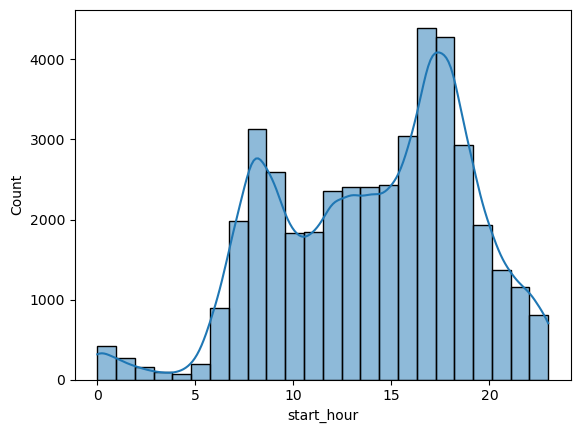

In [22]:
#Histogram
sns.histplot(citibike['start_hour'], bins =24, kde= True)

It makes sense that 8am is the busy a high point on the graph as people are heading to work. 

<Axes: xlabel='birth_year', ylabel='Count'>

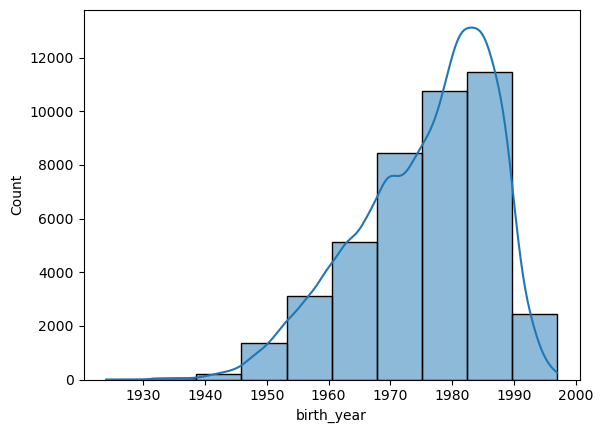

In [23]:
#Histogram
sns.histplot(citibike['birth_year'], bins =10, kde= True)

Most riders are born between 1970-1990.

<Axes: xlabel='trip_duration', ylabel='Count'>

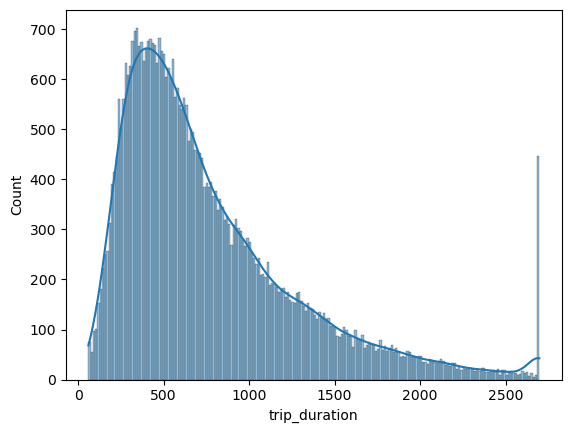

In [24]:
#Histogram
sns.histplot(citibike['trip_duration'], bins =200, kde= True)

According to the graph most people uses the bikes for less than 10 min.

In [25]:
# Change variable for trip duration to be able to calculate
citibike.loc[citibike['trip_duration'] < 600, 'trip category'] = 'under 10 minutes'
citibike.loc[(citibike['trip_duration'] >= 600) & (citibike['trip_duration']<1200), 'trip category'] = '10-20 minutes'
citibike.loc[citibike['trip_duration'] >= 1200, 'trip category'] = 'over 20 minutes'

In [26]:
citibike['trip category'].value_counts(dropna = False)

under 10 minutes    20612
10-20 minutes       14881
over 20 minutes      7500
Name: trip category, dtype: int64

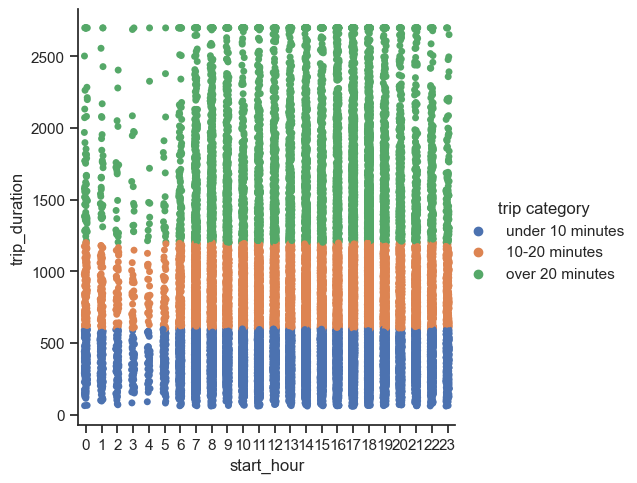

In [27]:
# create a categorical plot 
sns.set(style="ticks")
g=sns.catplot(x="start_hour", y= "trip_duration", hue="trip category", data=citibike)

# Step 7 - Revist Key Questions





At this point in the analysis I can answer one of my orginal questions. Which is what age group uses the bikes more. The analysis shows that people born from 1970-1990 are the biggest age group. The data set is from October 2013 so someone born in 1970 would be in there early 40s. 

I think so additional question would be what is the busiest time of day? 
Also are there stations that are busier then others?



# Step 8 - Define Hypotheses

It seems alot of local people use the bikes to commute to and from work. Especially since the age range is of people that are in there prime working years. 

# Export data

In [28]:
citibike.to_csv(os.path.join(path, '02 Data','prepared data', 'citibike_6.2.csv'))